In [1]:
#IMPORT ALL THE LIBARIES THAT WILL BE IN NEED

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scipy.stats as stats
from matplotlib.patches import ConnectionPatch


sns.set()
%matplotlib inline

In [2]:
#READ THE CSV FILE

test = pd.read_csv("data/TestingData.csv")
test.head()

C:\Users\hieut\AppData\Local\Temp\ipykernel_31804\1934320491.py:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("data/TestingData.csv")


,Year,Quarter,Country,Local Material Description,Product ID,Local Brand Name,Local Sub-Brand Name,Product Type,Global Brand Name,Standard Brand Name,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
0,2021,Q1,Egypt,BRAND1 SALT 75G 11P 5LE,26552831,BRAND1,BRAND1,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Q1,Egypt,BRAND1 BRAND613TO 10LE 6P 187G,26167968,BRAND1,BRAND1 Family,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Q1,Egypt,BRAND1 C AND O 10LE 6P 168G LOG,26612862,BRAND1,BRAND1 Family,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Q1,Egypt,BRAND1 SALT 10LE 6P 187G,26167969,BRAND1,BRAND1 Family,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Q1,Egypt,BRAND3 BRAND70 SPICY BRAND613TO 64G 9P 5LE,25416202,BRAND3,BRAND3 POPCORN,FOOD,BRAND3,BRAND3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train = pd.read_csv("data/TrainingData.csv")
train.head()

C:\Users\hieut\AppData\Local\Temp\ipykernel_31804\786063893.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("data/TrainingData.csv")


,Year,Quarter,Country,Local Material Description,Product ID,Local Brand Name,Local Sub-Brand Name,Product Type,Global Brand Name,Standard Brand Name,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
0,2020,Q1,Egypt,BRAND1 7 LE C AND O 120G 6P,23673483,BRAND1,BRAND1,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Q1,Egypt,BRAND2 CHEESE 84G 9P 5LE,24784584,BRAND2,BRAND2,FOOD,BRAND2,BRAND2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,Q1,Egypt,BRAND2 SWEET CHILLI 84G 9P 5LE,24784585,BRAND2,BRAND2,FOOD,BRAND2,BRAND2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Q1,Egypt,BRAND1 180G C AND O 6P,22200904,BRAND1,BRAND1 Family,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,Q1,Egypt,BRAND1 180G C AND L 6P,22200905,BRAND1,BRAND1 Family,FOOD,BRAND7,BRAND1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.describe()

,Year,Product ID,Kilojoules,Total Calories,Total Fat,Calories from Fat,Calories From Saturated Fat,Calories - Canada,Saturated Fat,Saturated Fat per 100 kcals,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
count,90347.0,9.034700e+04,54134.000000,80927.000000,80004.000000,9759.000000,1928.000000,7643.000000,80896.000000,80845.000000,...,1074.000000,6248.0,6248.000000,0.0,0.0,1659.000000,1874.0,2581.0,7660.000000,6248.0
mean,2020.0,1.663443e+07,759.822137,386.661509,19.876155,111.864046,57.655017,207.988650,5.025786,1.103245,...,0.000363,0.0,0.003449,NaN,NaN,0.201438,0.0,0.0,0.015598,0.0
std,0.0,9.605855e+06,942.714712,201.321987,14.275679,125.882933,32.659848,209.284566,5.221071,1.095525,...,0.003282,0.0,0.082132,NaN,NaN,0.462767,0.0,0.0,0.104492,0.0
min,2020.0,3.709360e+05,0.000000,0.000000,0.000000,0.000000,5.670000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,NaN,NaN,0.000000,0.0,0.0,0.000000,0.0
25%,2020.0,8.380778e+06,0.000000,238.700000,3.100000,0.024000,37.708500,23.051000,1.135000,0.340000,...,0.000000,0.0,0.000000,NaN,NaN,0.000000,0.0,0.0,0.000000,0.0
50%,2020.0,2.135254e+07,190.000000,490.000000,24.270000,39.079000,42.030000,47.635000,3.460000,0.760000,...,0.000000,0.0,0.000000,NaN,NaN,0.000000,0.0,0.0,0.000000,0.0
75%,2020.0,2.436532e+07,1958.112000,528.000000,32.000000,230.571000,73.349000,406.391000,7.500000,1.870000,...,0.000000,0.0,0.000000,NaN,NaN,0.000000,0.0,0.0,0.000000,0.0
max,2020.0,2.723825e+07,3076.000000,748.000000,82.500000,470.580000,136.212000,624.046000,53.380000,35.400000,...,0.030000,0.0,1.959000,NaN,NaN,1.720000,0.0,0.0,1.656000,0.0


In [5]:
test.describe()

,Year,Product ID,Kilojoules,Total Calories,Total Fat,Calories from Fat,Calories From Saturated Fat,Calories - Canada,Saturated Fat,Saturated Fat per 100 kcals,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
count,35202.000000,3.520200e+04,14889.000000,30826.000000,30111.000000,5153.000000,2966.000000,2055.000000,30826.000000,30826.000000,...,1783.000000,1542.000000,1542.000000,0.0,0.0,2658.000000,838.0,1045.000000,1856.000000,1542.0
mean,2021.493978,2.055394e+07,1179.114563,485.818767,25.750874,226.532678,68.335381,385.068944,6.376591,1.301187,...,0.000034,0.003385,0.007704,NaN,NaN,0.066588,0.0,0.002576,0.035385,0.0
std,0.499971,9.011966e+06,1002.383751,93.121105,10.754189,91.987962,36.373958,136.924653,5.025515,1.231810,...,0.001004,0.054181,0.123322,NaN,NaN,0.270455,0.0,0.031272,0.167755,0.0
min,2021.000000,3.709360e+05,0.000000,1.400000,0.000000,0.000000,8.190000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
25%,2021.000000,1.781649e+07,0.000000,470.000000,21.360000,197.850000,37.890000,357.166500,2.700000,0.580000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
50%,2021.000000,2.485818e+07,1630.915000,510.000000,28.000000,253.026000,47.675000,398.790000,4.490000,0.890000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
75%,2022.000000,2.650954e+07,2128.747000,537.540000,33.260000,294.830000,99.286000,479.904000,10.152000,2.150000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
max,2022.000000,2.767305e+07,3076.000000,748.000000,82.500000,470.580000,136.212000,624.046000,61.019000,79.290000,...,0.030000,0.870000,2.022000,NaN,NaN,1.906000,0.0,0.460000,1.656000,0.0


In [6]:
#FILTER OUT THE COLUMNS WITH NULL VALUES TO BE DROPPED

cols_drops = ["Carotenoid", 'Disaccharides', 'Flouride', 'Glycerol', 'Inulin', 'Monosaccharides', 'Neotame', 'Nitrogen', 
              'Phenylalanine + Tyrosine', 'Polydextrose', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine + Cystine',
              'Monounsaturated Fats', 'Polyunsaturated Fat', 'Cholesterol', 'Omega 3 Fatty Acids', 'Omega 6 Fatty Acids',
              'Linolenic Acid', 'DHA', 'Carbohydrates using Difference Method','Roll-Up Of Component Carbohydrates', 'Other Carbohydrates/Starch',
              'Sucrose', 'Fructose', 'Glucose', 'Sodium Excluding Contribution From Plant Water Ingredient',
              'Sodium (Historical Value) MG', 'Sodium (Including Canada Water)', 'Sodium (Including US Water)', 'Sodium From Components', 'Sodium In Water (Canada)',
              'Sodium In Water (US)', 'Salt', 'Dietary Fiber Not Allowable By US FDA', 'Total Dietary Fiber - US FDA',
              'Insoluble Fiber', 'Insoluble Fiber - US FDA', 'Insoluble Fiber Not Allowable By US FDA', 'Soluble Fiber',
              'Soluble Fiber - US FDA', 'Soluble Fiber Not Allowable By US FDA', 'Wheat Bran Fiber', 'Oat Content', 'Gluten', 'Beta Glucan', 'Whole Grains', 'Total Grains',
              'Fruits - Solids', 'Fruits - Liquids', 'Vegetables - Solids', 'Vegetables - Liquids', 'Total Dairy Products', 'Low Fat Dairy',
              'Nuts & Seeds', 'Legumes', 'Beta Carotene', 'Beta Carotene, Prior To Loss Factor', 'Historical Value: Beta Carotene',
              'Historical Value: Beta Carotene, Prior To Loss Factor', 'Biotin', 'Biotin, Prior To Loss Factor', 'Calcium', 
              'Calcium, Prior To Loss Factor', 'Chloride', 'Chloride, Prior To Loss Factor', 'Total Choline','Chromium',
              'Chromium, Prior To Loss Factor', 'Copper', 'Copper, Prior To Loss Factor', 'Folate', 'Folate, Prior To Loss Factor', 
              'Folic Acid', 'Folic Acid, Prior To Loss Factor', 'Folic Acid (Synthetic)', 'Folic Acid (Synthetic), Prior To Loss Factor',
              'Iodine', 'Iodine, Prior To Loss Factor', 'Iron', 'Iron, Prior To Loss Factor', 'Manganese', 'Manganese, Prior To Loss Factor',
              'Magnesium', 'Magnesium, Prior To Loss Factor', 'Molybdenum', 'Molybdenum, Prior To Process Loss', 'Niacin',
              'Niacin Equivalents', 'Niacin, Prior To Loss Factor', 'Pantothenic Acid', 'Pantothenic Acid, Prior To Loss Factor',
              'Phosphorus', 'Phosphorus, Prior To Loss Factor', 'Potassium', 'Riboflavin', 'Vitamin B2-Riboflavin, Prior To Loss Factor',
              'Selenium', 'Selenium, Prior To Loss Factor', 'Thiamin', 'Vitamin B1-Thiamin, Prior To Loss Factor', 'Vitamin A', 'Vitamin A, Prior To Loss Factor', 
              'Historical Value: Vitamin A', 'Historical Value: Vitamin A, Prior To Loss Factor', 'Vitamin A (RAE)', 'Vitamin A, Prior To Loss Factor (RAE)',
              'Vitamin B12', 'Vitamin B12, Prior To Loss Factor', 'Vitamin B6','Vitamin B6, Prior To Loss Factor', 'Vitamin C', 'Vitamin C, Prior To Loss Factor', 'Vitamin D', 
              'Vitamin D, Prior To Loss Factor', 'Historical Value: Vitamin D', 'Historical Value: Vitamin D, Prior To Loss Factor', 
              'Vitamin E', 'Vitamin E, Prior To Loss Facto', 'Historical Value: Vitamin E', 'Historical Value: Vitamin E (IU), Prior To Loss Factor', 
              'Vitamin K', 'Vitamin K, Prior To Loss Factor', 'Zinc', 'Zinc, Prior To Loss Factor', 'Acesulfame Potassium','Aspartame',
              'Erythritol', 'Isomalt','Lactitol','Maltitol', 'Maltitol Syrup', 'Mannitol', 'Rebaudioside A', 'Saccharin', 'Sorbitol',
              'Sorbitol Syrup', 'Sucralose', 'Sorbic Acid', 'Stearic Acid','Steviol Glycosides', 'Tagatose', 'Xylitol',
              'Flavonoids', 'Hydrogenated Starch Hydrolysales', 'Inositol','Moisture', 'Moisture, Pre-Adjusted','Caffeine', 
              'Alcohol','Sugar Alcohol','Sugar Alcohol - Canada', 'Formula Alcohol','Benzoic Acid', 'Ash', 'Proline', 
              'Taurine', 'Threonine','Tryptophan','Valine','L-Arginine','L-Carnitine', "Local Brand Name", "Local Sub-Brand Name",
              "Product ID", "Local Brand Name", "Local Sub-Brand Name", "Global Brand Name", "Standard Brand Name", "Standard Sub-Brand Name",
              "Sub-Category Name", "Segment Name", "Flavor", "Sub-Segment Name", "Volume Units", "Calories from Fat", "Calories From Saturated Fat",
              "Calories - Canada", "Kilojoules",
             ]



In [7]:
#DROP THE IRRELEVANT COLUMNS

train_cleaned = train.drop(columns = cols_drops)
test_cleaned = test.drop(columns = cols_drops)

In [8]:
(train_cleaned.isna().sum() / len(train_cleaned))*100

Year                                     0.000000
Quarter                                  0.000000
Country                                  0.000000
Local Material Description               0.008855
Product Type                             0.000000
Category Name                           20.365922
Standard Flavor Name                    41.275305
Total Calories                          10.426467
Total Fat                               11.448084
Saturated Fat                           10.460779
Saturated Fat per 100 kcals             10.517228
Trans Fatty Acids                       17.384086
Carbohydrate Total                      30.441520
Sugars                                  29.147620
Added Sugars                            13.447043
Calories from Added Sugars per 355ml    13.447043
% of Energy from Added Sugars           13.503492
Sodium                                  10.470741
Sodium per kcal                         10.527190
Protein                                 11.749145


In [9]:
(test_cleaned.isna().sum() / len(test_cleaned))*100

Year                                     0.000000
Quarter                                  0.000000
Country                                  0.000000
Local Material Description               0.005681
Product Type                             0.000000
Category Name                           50.559627
Standard Flavor Name                    54.488381
Total Calories                          12.431112
Total Fat                               14.462246
Saturated Fat                           12.431112
Saturated Fat per 100 kcals             12.431112
Trans Fatty Acids                       16.436566
Carbohydrate Total                      34.605988
Sugars                                  26.313846
Added Sugars                            17.655247
Calories from Added Sugars per 355ml    17.655247
% of Energy from Added Sugars           17.655247
Sodium                                  12.433953
Sodium per kcal                         12.433953
Protein                                 14.655417


In [10]:
test_cleaned = test_cleaned.drop_duplicates()
test_cleaned.duplicated().sum()

0

In [11]:
train_cleaned = train_cleaned.drop_duplicates()
train_cleaned.duplicated().sum()

0

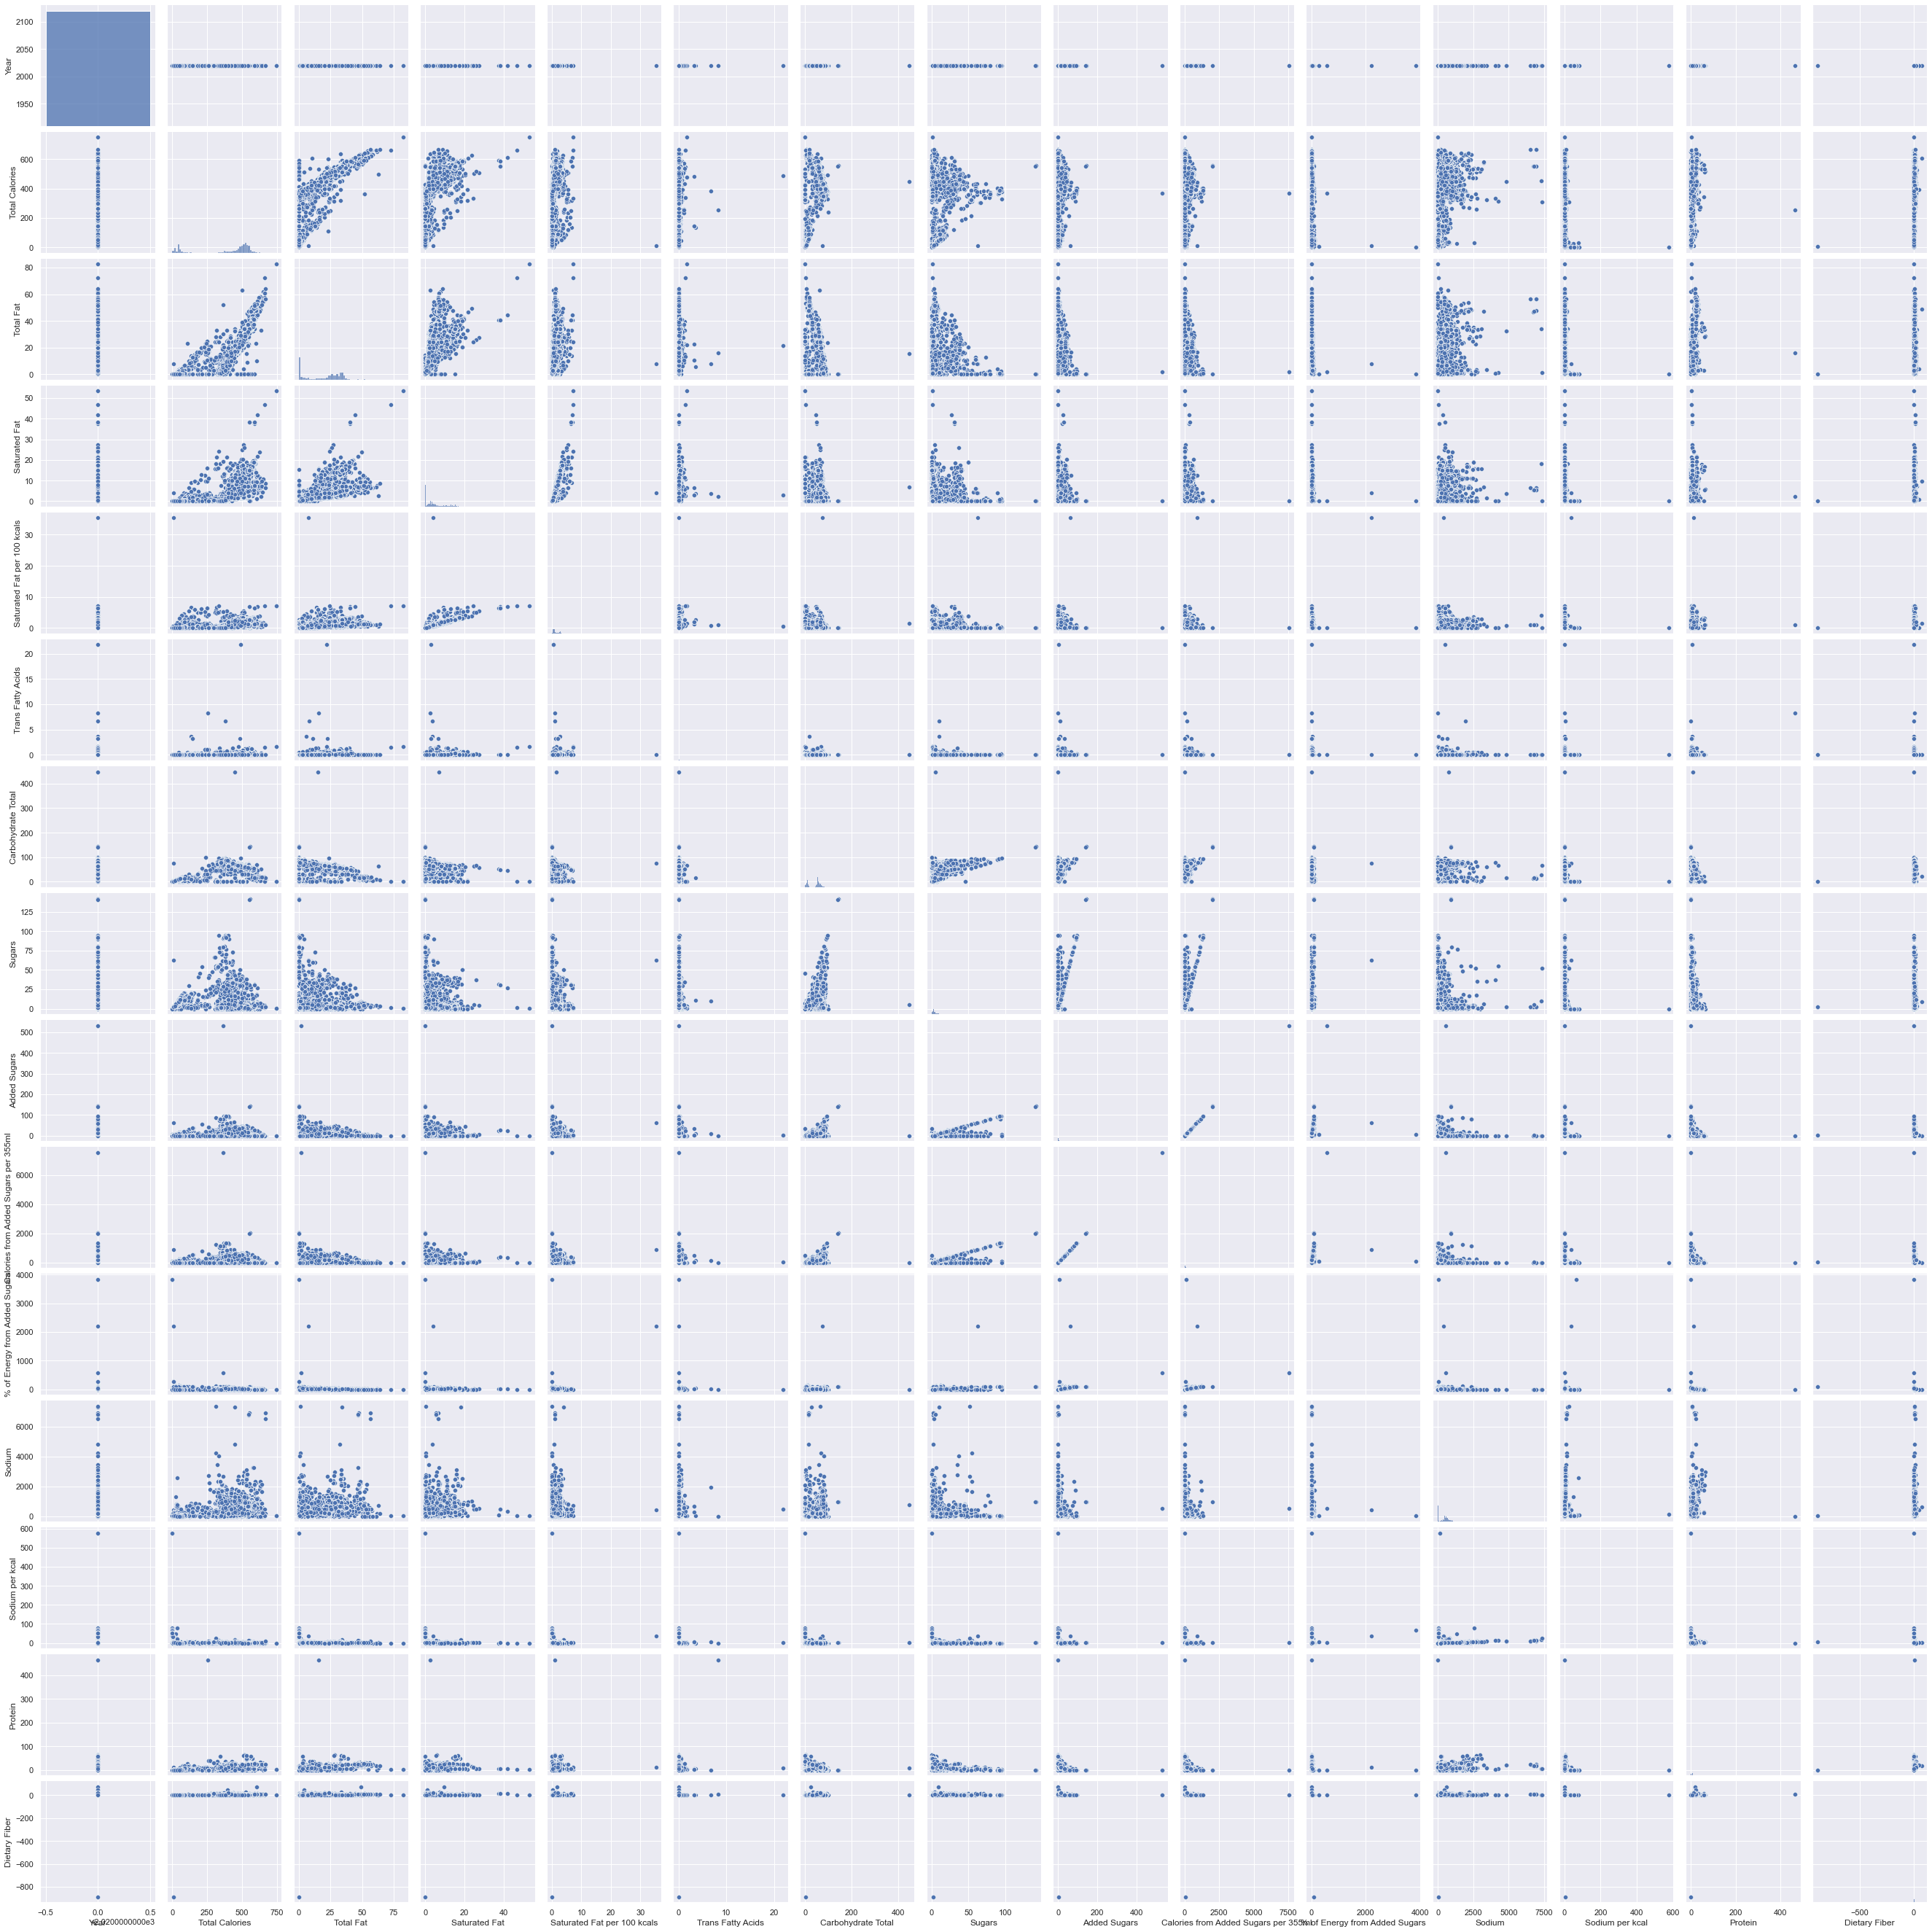

In [12]:
#CHECK FOR OUTLINERS

sns.pairplot(train_cleaned)

In [13]:
#CONVERT THE COLUMNS NAME INTO LOWERCASE
train_cleaned.columns = train_cleaned.columns.str.lower()
train_cleaned.columns = train_cleaned.columns.str.replace(" ", "_")
test_cleaned.columns = test_cleaned.columns.str.lower()
test_cleaned.columns = test_cleaned.columns.str.replace(" ", "_")

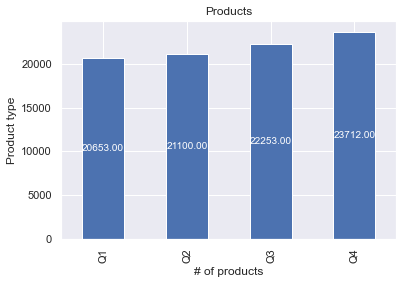

In [14]:
#TOTAL PRODUCTS BY EACH QUARTER IN YEAR 2020
ax = train_cleaned["quarter"].value_counts(ascending = True).plot(kind= 'bar')
ax.set_xlabel("# of products")
ax.set_ylabel("Product type")
ax.set_title("Products")
for bars in ax.containers:
    labels = [f"{bar.get_height():.2f}" if bar.get_height() > 0.2 else '' for bar in bars]
    ax.bar_label(bars, labels=labels, label_type='center', color='white')

Text(0.5, 1.0, 'Sugars & Total Calories in each product type')

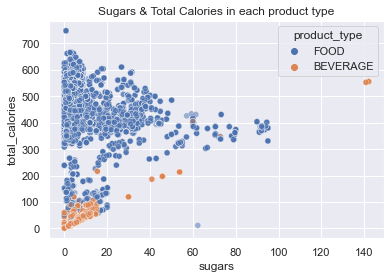

In [15]:
ax = sns.scatterplot(data = train_cleaned, x = "sugars", y = "total_calories", hue = "product_type", alpha = 0.5)
ax.set_title("Sugars & Total Calories in each product type")

In [16]:
#THERE ARE MORE SUGARS IN FOODS TYPE THEN BEVERAGE. BEFORE IT IS LESS IN SUGARS BUT MORE IN CALORIES, IT IS DECREASING ON CALORIES BUT INCREASING IN SUGARS FOR BOTH PRODUCT TYPE

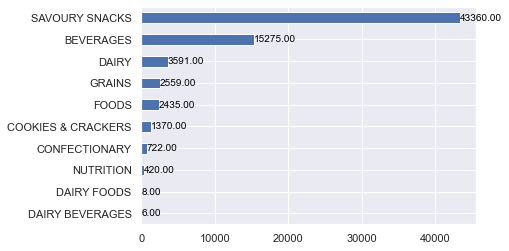

In [17]:
#WORLDWIDE'S CATEGORY PRODUCT
ax = train_cleaned.category_name.value_counts(ascending = True).plot(kind = "barh")
for bars in ax.containers:
    labels = [f"{bar.get_width():.2f}" if bar.get_width() > 0.5 else '' for bar in bars]
    ax.bar_label(bars, labels=labels, label_type='edge', color='black')

In [18]:
#AS IN THE HORIZONTAL BAR CHART WE CAN VISUALIZE THAT SAVOURY SNACKS ARE THE BEST SELLER ALL OVER THE CATEGORY 

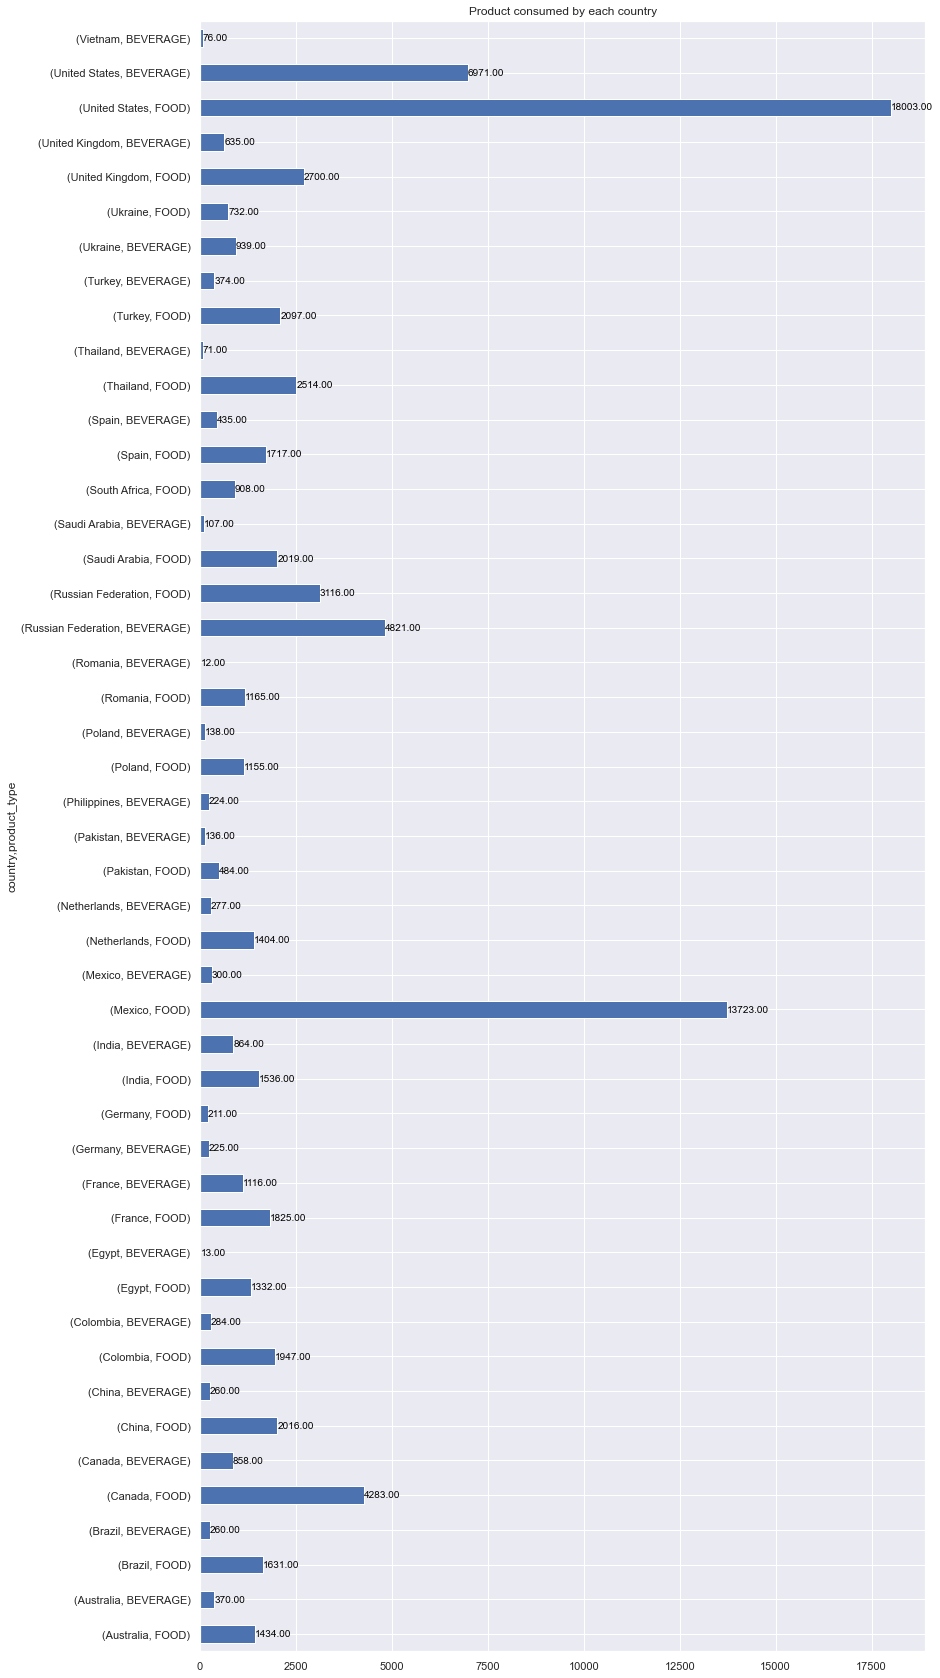

In [19]:
#GROUPBY CONTRY AND PRODUCT TYPE BY EACH COUNTRY
country_gb = train_cleaned.groupby("country")
ax=country_gb.product_type.value_counts().plot(kind = "barh", figsize = (13, 30))
ax.set_title("Product consumed by each country")
for bars in ax.containers:
    labels = [f"{bar.get_width():.2f}" if bar.get_width() > 0.5 else '' for bar in bars]
    ax.bar_label(bars, labels=labels, label_type='edge', color='black')

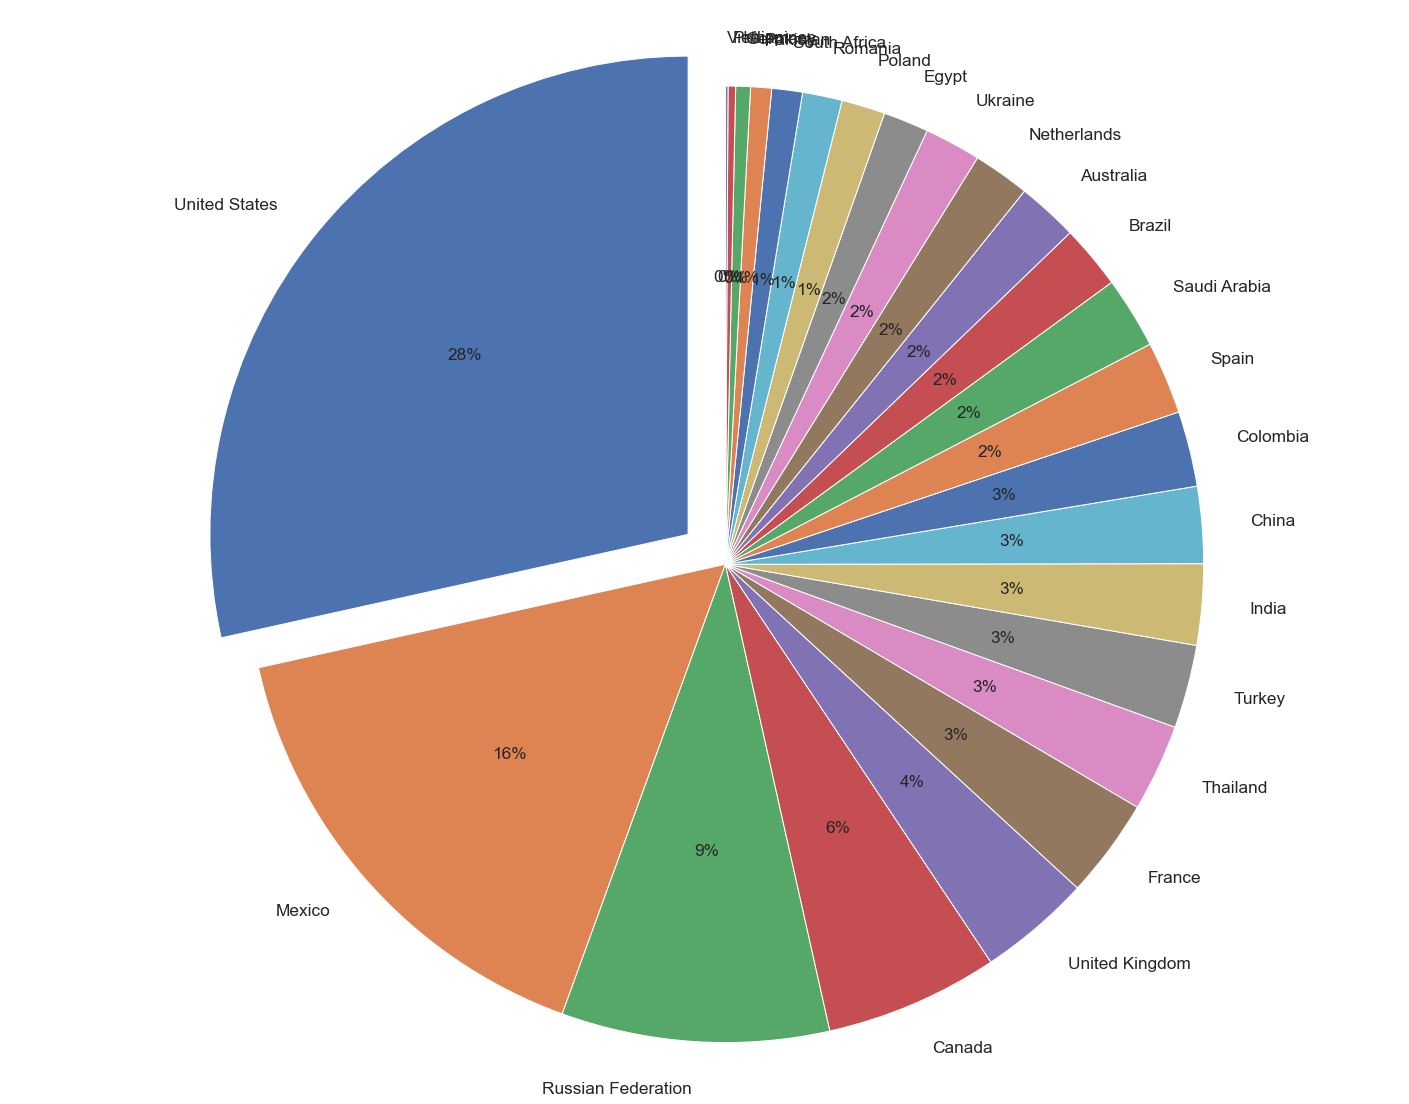

In [20]:
explode = [0.1]

for i in range(len(train_cleaned["country"].value_counts().index)-1):
    explode.append(0)
explode
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = train_cleaned["country"].value_counts().index
sizes = train_cleaned["country"].value_counts()/len(train_cleaned["country"])

fig1, ax1 = plt.subplots(figsize = (25, 20))
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #shadow=True, startangle=90)

patches, texts, autotexts = ax1.pie(sizes, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'xx-large'},
                                           radius=1, startangle=90, explode = explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

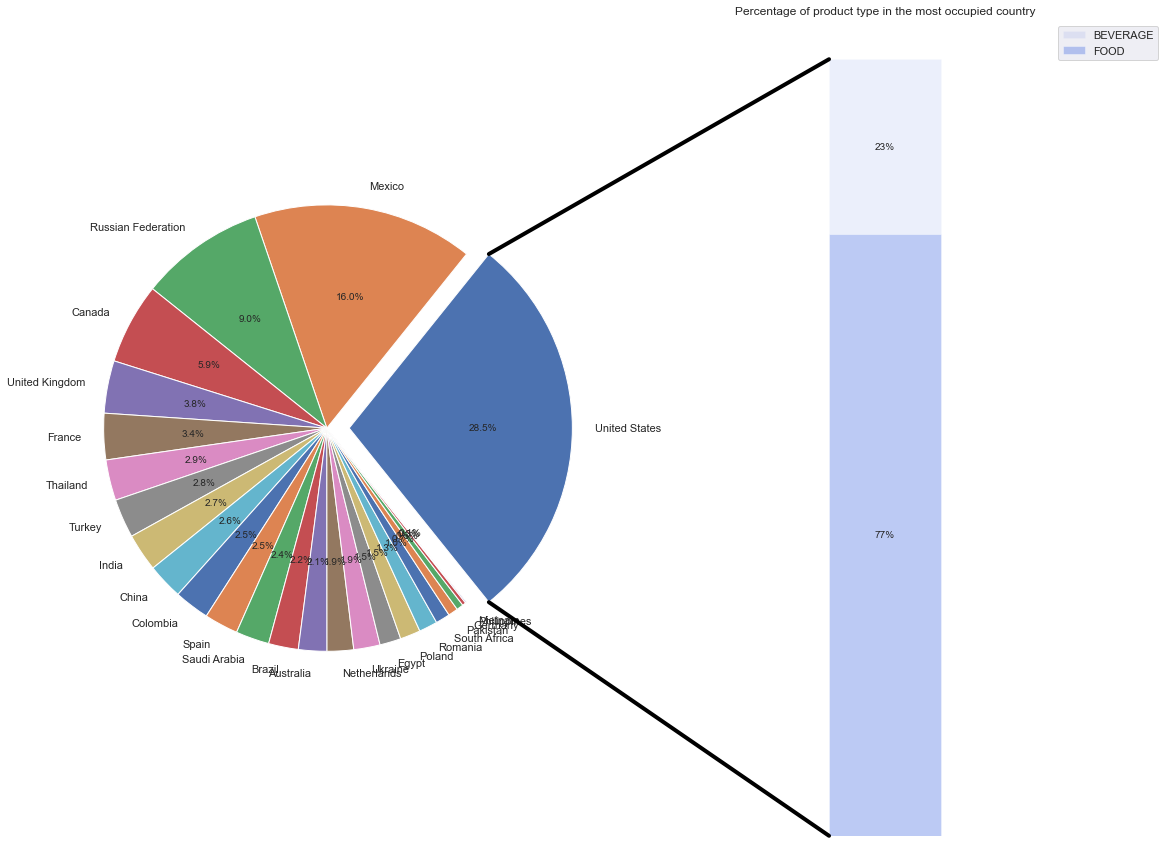

In [21]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = train_cleaned["country"].value_counts()/len(train_cleaned["country"])
labels = train_cleaned["country"].value_counts().index

# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode = explode)

# bar chart parameters
product_ratios = train_cleaned["product_type"].value_counts()/len(train_cleaned["product_type"])
product_labels = train_cleaned["product_type"].value_counts().index
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(product_ratios, product_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='royalblue', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Percentage of product type in the most occupied country')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(product_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

<AxesSubplot:>

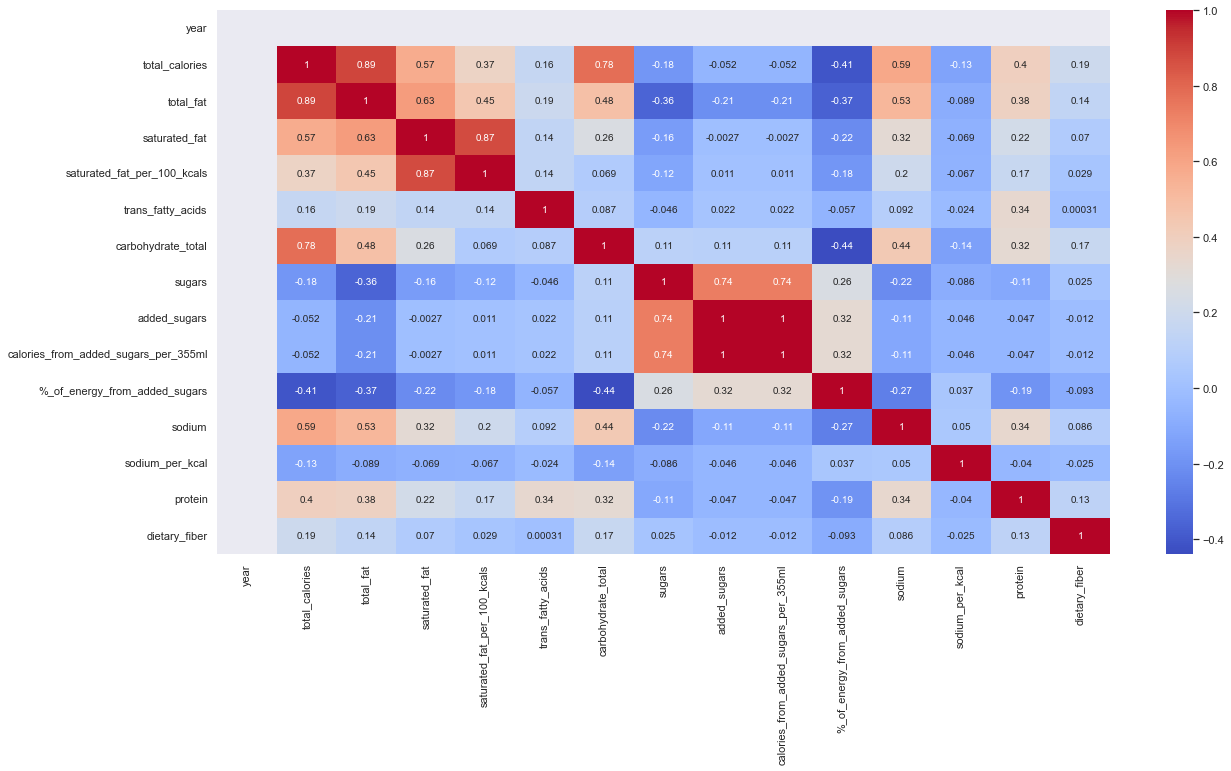

In [22]:
plt.figure(figsize=(20,10))
corr = train_cleaned.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm" )

In [23]:
#HANDLING WITH EMPTY VALUES IN TRAINING DATASET

train_cleaned = train_cleaned.fillna(-999)
test_cleaned = test_cleaned.fillna(-999)

#CREATING A CONSTANT VALUE COLUMN IN ORDER TO MAKE THE MODEL NON-NEGATIVE
train_cleaned["constant"] = 1
test_cleaned["constant"] = 1



In [24]:
#GET DUMMIES VARIABLES ON CATEGORY TO GET SUGARS BASED ON IT
train_cleaned = pd.get_dummies(train_cleaned, columns= ["category_name", "product_type"], drop_first = True)
test_cleaned = pd.get_dummies(test_cleaned, columns= ["category_name", "product_type"], drop_first = True)

In [25]:
feature_selected = ["total_calories", "total_fat", "sugars", 
                     "protein",'%_of_energy_from_added_sugars',
                    'sodium', 'sodium_per_kcal', 'constant',
                    'dietary_fiber','category_name_CONFECTIONARY', 'category_name_COOKIES & CRACKERS',
                   'category_name_DAIRY', 'category_name_DAIRY FOODS', 'category_name_FOODS',
                   'category_name_GRAINS', 'category_name_NUTRITION',
                   'category_name_SAVOURY SNACKS'
                   ]

In [26]:
x_train = train_cleaned[feature_selected]
y_train = train_cleaned["added_sugars"]
x_test = test_cleaned[feature_selected]
y_test = test_cleaned["added_sugars"]

In [27]:
x_train.shape

(87718, 17)

In [28]:
x_test.shape

(34357, 17)

In [29]:
model = RandomForestRegressor(n_estimators = 1000)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [30]:
y_pred = model.predict(x_test).round(2)

In [31]:
pred_df = pd.DataFrame(y_pred, columns = ["predictions"])
pred_df["actual"] = y_test
pred_df["abs"] = abs(pred_df["predictions"] - pred_df["actual"])
pred_df.head()

,predictions,actual,abs
0,0.60,0.6,0.00
1,6.08,5.8,0.28
2,-999.00,-999.0,0.00
3,0.60,0.6,0.00
4,7.00,7.0,0.00


In [32]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.9998551546219638
Mean Absolute Error: 0.11158570305905635
